## EDA (Exploratory Data Analysis) [Detailed]

In this EDA process we will try to answer these questions: 

* What is the shape of our dataset?
* Do we have set the correct data types for our features?
* Is there any unnecessary data?
* Are there any duplicate rows or columns?
* Is there any possiblity for data enrichment?
* Are there any null values?

Human Resources Data Set:
https://www.kaggle.com/datasets/rhuebner/human-resources-data-set?resource=download

In [1]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

#### We load data from csv file. If you want to load data from an excel file please use the code given in the comment line.

We can define the dates by adding parse_dates['Your Date Column'].

In [2]:
df = pd.read_csv('HRDataset_v14.csv',parse_dates=['LastPerformanceReview_Date','DOB','DateofHire','DateofTermination'])

#To load data without any data type 
#df = pd.read_csv('HRDataset_v14.csv')

#To load data from excel file:
#df = pd.read_excel (r'dbs2.xlsx')

#### df.head(10) will show you a sample of your loaded data. If you add display.max_columns option, you can see all of the columns in the dataset. Otherwise jupyter will may hide some of your columns. 

In [3]:
pd.set_option('display.max_columns', None)
df.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,NaT,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,1988-09-19,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,No,White,2008-01-07,NaT,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,0,19,Production Technician I,MA,1844,1977-05-22,F,Single,US Citizen,No,White,2012-01-09,NaT,N/A-StillEmployed,Active,Production,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,2019-01-07,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,0,24,Software Engineer,MA,2110,1979-05-24,F,Single,US Citizen,No,White,2014-11-10,NaT,N/A-StillEmployed,Active,Software Engineering,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,2019-01-02,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,0,19,Production Technician I,MA,2199,1983-02-18,M,Widowed,US Citizen,No,White,2013-09-30,NaT,N/A-StillEmployed,Active,Production,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2019-02-25,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,0,19,Production Technician I,MA,1902,2070-02-11,F,Single,US Citizen,No,Black or African American,2009-07-06,NaT,N/A-StillEmployed,Active,Production,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,2019-01-25,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,0,14,IT Support,MA,1886,1988-01-07,M,Divorced,US Citizen,No,White,2015-01-05,NaT,N/A-StillEmployed,Active,IT/IS,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2019-02-18,0,16


#### When we use the.shape function on the dataset, Pandas gives us a pair of values that show how dimensional our dataset is. Understanding the dataset's size and number of columns is made much easier by this feature.

In [4]:
df.shape

(311, 36)

#### info() gives us a shorter summary of our dataset. It returns us information about the data type, non-null values and memory usage.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

#### You can decrease memory usage by using parameter downcast in to_numeric with selecting integers and floats columns by DataFrame.select_dtypes.

In [6]:
fcols = df.select_dtypes('float').columns
icols = df.select_dtypes('integer').columns
df[fcols] = df[fcols].apply(pd.to_numeric, downcast='float')
df[icols] = df[icols].apply(pd.to_numeric, downcast='integer')

#You can convert all numbers to integer with the code below
#m = train_df.select_dtypes(np.number)
#train_df[m.columns]= m.round().astype('Int64')

#You can manually change data types with astype function
#df['EmpID']= df['EmpID'].astype('Int32')
#df['MarriedID'] = df['MarriedID'].astype('Int32')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int16         
 2   MarriedID                   311 non-null    int8          
 3   MaritalStatusID             311 non-null    int8          
 4   GenderID                    311 non-null    int8          
 5   EmpStatusID                 311 non-null    int8          
 6   DeptID                      311 non-null    int8          
 7   PerfScoreID                 311 non-null    int8          
 8   FromDiversityJobFairID      311 non-null    int8          
 9   Salary                      311 non-null    int32         
 10  Termd                       311 non-null    int8          
 11  PositionID                  311 non-null    int8          

#### You can list the null values in a dataset with isnull() function. 

In [7]:
df.isnull()
#df.isnull().any(axis=1)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
307,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
308,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
309,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


#### A better way to start maybe looking the sum of null values in every column. 

In [8]:
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

#### Let's replace the null values with 0 and take a look at the result. 

In [9]:
df.replace(np.nan,'0',inplace = True)

#Check the changes now
df.isnull().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

#### describe() funnction tells us measures like count, mean, std, min and max for every column. 

In [10]:
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,4.109999,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,5.000000,5.000000,8.000000,6.000000,20.000000


#### When we add (include='all') expression we can describe the data including strings.

In [11]:
df.describe(include='all', datetime_is_numeric=True)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
count,311,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311,311,311.000000,311,311,311,311,311,311,311,311,311,311,311,311,311.0,311,311,311.000000,311.000000,311.000000,311,311.000000,311.000000
unique,311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,28,NaN,NaN,2,5,3,4,6,NaN,97,18,3,6,21,24.0,9,4,NaN,NaN,NaN,NaN,NaN,NaN
top,"Adinolfi, Wilson K",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Production Technician I,MA,NaN,NaN,F,Single,US Citizen,No,White,NaN,0,N/A-StillEmployed,Active,Production,Michael Albert,20.0,Indeed,Fully Meets,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,276,NaN,NaN,176,137,295,282,187,NaN,207,207,207,209,22,22.0,87,243,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,NaN,NaN,6555.482315,1999-05-11 08:43:12.926045056,NaN,NaN,NaN,NaN,NaN,2013-02-03 22:50:32.797427712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.109999,3.890675,1.218650,2017-09-10 21:17:56.527331072,0.414791,10.237942
min,NaN,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,NaN,NaN,1013.000000,1972-02-09 00:00:00,NaN,NaN,NaN,NaN,NaN,2006-01-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.120000,1.000000,0.000000,2010-07-14 00:00:00,0.000000,1.000000
25%,NaN,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,NaN,NaN,1901.500000,1979-07-15 00:00:00,NaN,NaN,NaN,NaN,NaN,2011-07-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.690000,3.000000,0.000000,2016-03-19 12:00:00,0.000000,5.000000
50%,NaN,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,NaN,NaN,2132.000000,1985-03-15 00:00:00,NaN,NaN,NaN,NaN,NaN,2013-02-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.280000,4.000000,0.000000,2019-01-16 00:00:00,0.000000,10.000000
75%,NaN,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,NaN,NaN,2355.000000,1989-09-15 00:00:00,NaN,NaN,NaN,NaN,NaN,2014-09-23 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.700000,5.000000,0.000000,2019-02-04 00:00:00,0.000000,15.000000
max,NaN,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,NaN,NaN,98052.000000,2071-10-23 00:00:00,NaN,NaN,NaN,NaN,NaN,2018-07-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,8.000000,2019-02-28 00:00:00,6.000000,20.000000


#### We can also describe a grouped data.

In [12]:
df.groupby('GenderID').describe(include='all', datetime_is_numeric=True)

Employee_Name                                                       \
                 count unique                  top freq mean  min  25%  50%   
GenderID                                                                      
0                  176    176    Akinkuolie, Sarah    1  NaN  NaN  NaN  NaN   
1                  135    135  Adinolfi, Wilson  K    1  NaN  NaN  NaN  NaN   

                         EmpID                                         \
          75%  max  std  count unique top freq          mean      min   
GenderID                                                                
0         NaN  NaN  NaN  176.0    NaN NaN  NaN  10153.176136  10002.0   
1         NaN  NaN  NaN  135.0    NaN NaN  NaN  10159.681481  10001.0   

                                                          MarriedID         \
               25%      50%       75%      max        std     count unique   
GenderID                                                                     
0         10081.75  10152.0  10227.75  10304.0  87.148790     176.0    NaN   
1         10071.00  10167.0  10238.50  10311.0  93.613898     135.0    NaN   

                                                                \
         top freq      mean  min  25%  50%  75%  max       std   
GenderID                                                         
0        NaN  NaN  0.409091  0.0  0.0  0.0  1.0  1.0  0.493069   
1        NaN  NaN  0.385185  0.0  0.0  0.0  1.0  1.0  0.488451   

         MaritalStatusID                                                     \
                   count unique top freq      mean  min  25%  50%  75%  max   
GenderID                                                                      
0                  176.0    NaN NaN  NaN  0.835227  0.0  0.0  1.0  1.0  4.0   
1                  135.0    NaN NaN  NaN  0.777778  0.0  0.0  1.0  1.0  4.0   

                   EmpStatusID                                                \
               std       count unique top freq      mean  min  25%  50%  75%   
GenderID                                                                       
0         0.950854       176.0    NaN NaN  NaN  2.443182  1.0  1.0  1.0  5.0   
1         0.935747       135.0    NaN NaN  NaN  2.325926  1.0  1.0  1.0  5.0   

                        DeptID                                                \
          max       std  count unique top freq      mean  min  25%  50%  75%   
GenderID                                                                       
0         5.0  1.797509  176.0    NaN NaN  NaN  4.647727  1.0  5.0  5.0  5.0   
1         5.0  1.794809  135.0    NaN NaN  NaN  4.562963  1.0  4.0  5.0  5.0   

                        PerfScoreID                                           \
          max       std       count unique top freq      mean  min  25%  50%   
GenderID                                                                       
0         6.0  1.047880       176.0    NaN NaN  NaN  3.005682  1.0  3.0  3.0   
1         6.0  1.130364       135.0    NaN NaN  NaN  2.940741  1.0  3.0  3.0   

                             FromDiversityJobFairID                            \
          75%  max       std                  count unique top freq      mean   
GenderID                                                                        
0         3.0  4.0  0.529120                  176.0    NaN NaN  NaN  0.085227   
1         3.0  4.0  0.655208                  135.0    NaN NaN  NaN  0.103704   

                                            Salary                  \
          min  25%  50%  75%  max       std  count unique top freq   
GenderID                                                             
0         0.0  0.0  0.0  0.0  1.0  0.280016  176.0    NaN NaN  NaN   
1         0.0  0.0  0.0  0.0  1.0  0.306011  135.0    NaN NaN  NaN   

                                                                       \
                  mean      min      25%      50%       75%       max   
GenderID               

#### We can describe only a column. 

In [13]:
df.Salary.describe(include='all')

count       311.000000
mean      69020.684887
std       25156.636930
min       45046.000000
25%       55501.500000
50%       62810.000000
75%       72036.000000
max      250000.000000
Name: Salary, dtype: float64

#### Lets look at a quick histogram of salary column. 

<AxesSubplot:>

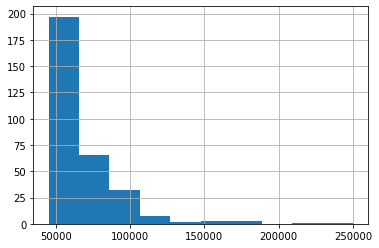

In [14]:
df.Salary.hist()

#### Find the sum duplicates in the dataset.

In [15]:
df.duplicated().sum()

0

#### With value_counts() we can understand how many values of a given variable there are in our dataset in a specific column. 

In [16]:
df.PerfScoreID.value_counts()

3    243
4     37
2     18
1     13
Name: PerfScoreID, dtype: int64

#### Let's visualise this with seaborn. 

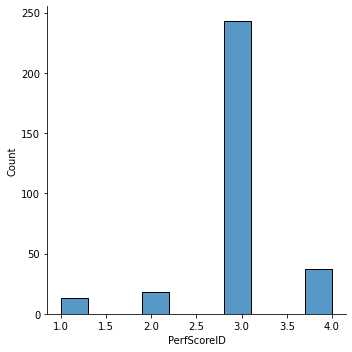

In [17]:
sns.displot(df['PerfScoreID'])

#### Another way is using pyplot.

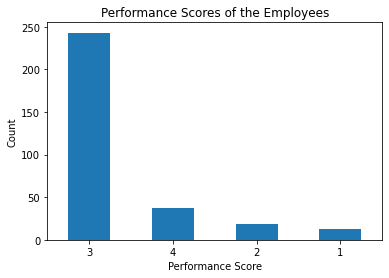

In [18]:
df.PerfScoreID.value_counts().plot(kind="bar")
plt.title("Performance Scores of the Employees")
plt.xlabel("Performance Score")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

#### You can also express the data as a percentage by passing normalize = True

In [19]:
df.PerfScoreID.value_counts(normalize=True)

3    0.781350
4    0.118971
2    0.057878
1    0.041801
Name: PerfScoreID, dtype: float64

#### You can see unique values in a column with unique() function.

In [20]:
print(df['MarriedID'].unique())

[0 1]


#### Let's plot the unique values.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MarriedID', ylabel='count'>

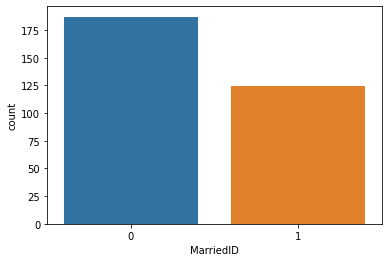

In [21]:
sns.countplot(df['MarriedID'])

#### With dtypes we can see the data type of every column. 

In [22]:
df.dtypes

Employee_Name                         object
EmpID                                  int16
MarriedID                               int8
MaritalStatusID                         int8
GenderID                                int8
EmpStatusID                             int8
DeptID                                  int8
PerfScoreID                             int8
FromDiversityJobFairID                  int8
Salary                                 int32
Termd                                   int8
PositionID                              int8
Position                              object
State                                 object
Zip                                    int32
DOB                           datetime64[ns]
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                    datetime64[ns]
DateofTerm

##### You can make a boxplot of a column easyly with boxplot() function. 

<AxesSubplot:>

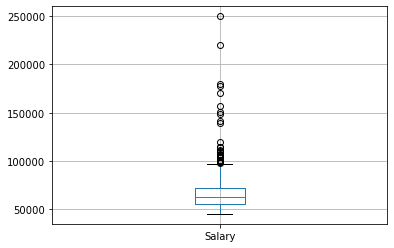

In [23]:
df[['Salary']].boxplot()

#### You can see the correlation between columns in a correlation matrix with corr() function. 

In [24]:
df.corr()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
EmpID,1.000000,0.048058,-0.043851,0.035914,0.073750,0.107406,-0.691348,0.046805,-0.115319,0.092389,-0.036488,0.026858,-0.589664,-0.146967,-0.043730,0.495513,-0.025278
MarriedID,0.048058,1.000000,0.164044,-0.024199,0.085619,-0.119932,-0.058362,-0.012708,0.026165,0.077028,-0.027334,-0.041147,-0.091178,-0.126191,0.061278,0.002875,0.096086
MaritalStatusID,-0.043851,0.164044,1.000000,-0.030236,0.114630,0.012768,0.044693,0.041117,-0.070291,0.099367,0.021923,0.010620,0.033249,0.002068,-0.051093,-0.096500,0.018722
GenderID,0.035914,-0.024199,-0.030236,1.000000,-0.032440,-0.038838,-0.054915,0.031493,0.056097,-0.015741,-0.081612,0.048539,-0.036276,-0.044603,0.087073,0.080329,-0.004577
EmpStatusID,0.073750,0.085619,0.114630,-0.032440,1.000000,0.088711,-0.071208,0.189025,-0.110912,0.948058,0.221221,-0.150527,0.024305,0.010553,-0.166560,0.078318,0.091834
DeptID,0.107406,-0.119932,0.012768,-0.038838,0.088711,1.000000,-0.084811,-0.129998,-0.448132,0.065922,0.030294,0.290023,-0.094940,0.031997,-0.785101,0.124630,0.053308
PerfScoreID,-0.691348,-0.058362,0.044693,-0.054915,-0.071208,-0.084811,1.000000,0.012315,0.130903,-0.089061,0.005227,-0.058350,0.544927,0.303579,0.045677,-0.734728,0.046629
FromDiversityJobFairID,0.046805,-0.012708,0.041117,0.031493,0.189025,-0.129998,0.012315,1.000000,0.041248,0.147717,0.015085,-0.028314,-0.013040,-0.034468,0.031393,0.042532,0.062640
Salary,-0.115319,0.026165,-0.070291,0.056097,-0.110912,-0.448132,0.130903,0.041248,1.000000,-0.093994,-0.130563,-0.037242,0.064966,0.062718,0.508333,-0.069443,0.082382
Termd,0.092389,0.077028,0.099367,-0.015741,0.948058,0.065922,-0.089061,0.147717,-0.093994,1.000000,0.147042,-0.139006,-0.017543,-0.004732,-0.147429,0.136379,0.098274


#### Let's make it visual with a heatmap. 

https://towardsdatascience.com/5-ways-to-use-a-seaborn-heatmap-python-tutorial-c79950f5add3

<AxesSubplot:>

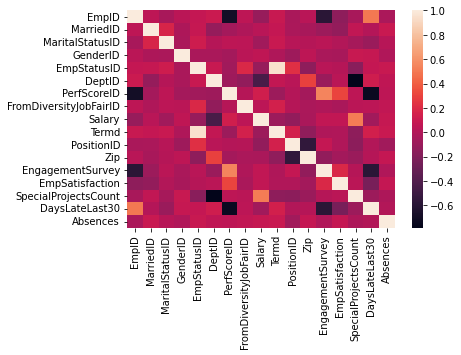

In [25]:
sns.heatmap(df.corr())

#### We can do this with limited column set to focus more. Let's create a new dataset called "dfcor".

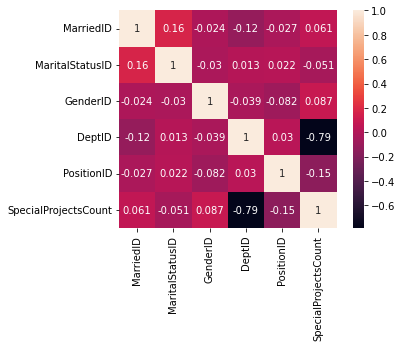

In [26]:
dfcor=df[['MarriedID','MaritalStatusID','GenderID','DeptID','PositionID','SpecialProjectsCount']]
corr = dfcor.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

#### This is important so below you can find settings of seaborns heatmap function.

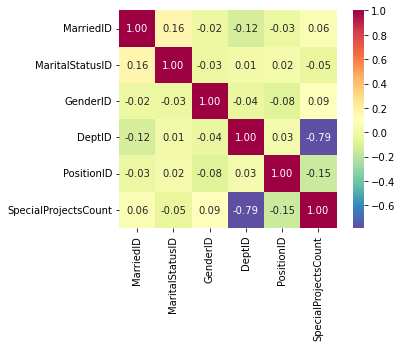

In [27]:
corr = dfcor.corr()
hm = sns.heatmap(corr, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=dfcor.columns, 
                 xticklabels=dfcor.columns, 
                 cmap="Spectral_r")
plt.show()

#### With figsize you can create bigger images. 

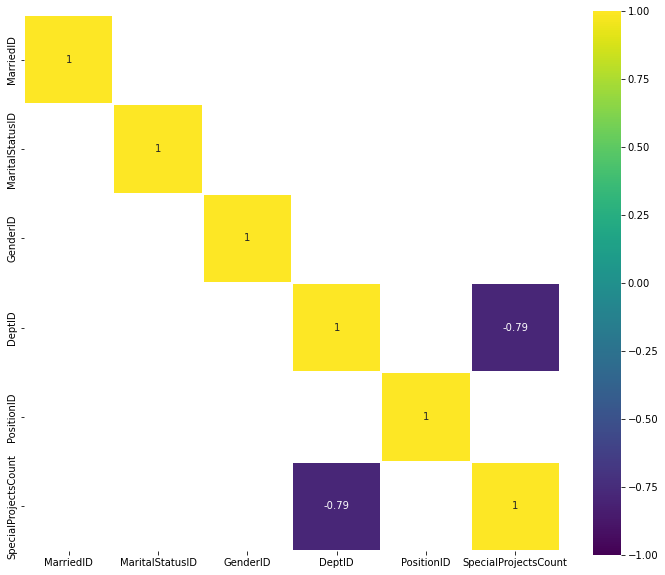

In [28]:
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True);

#### You can make histogram of all columns with a one line code. 

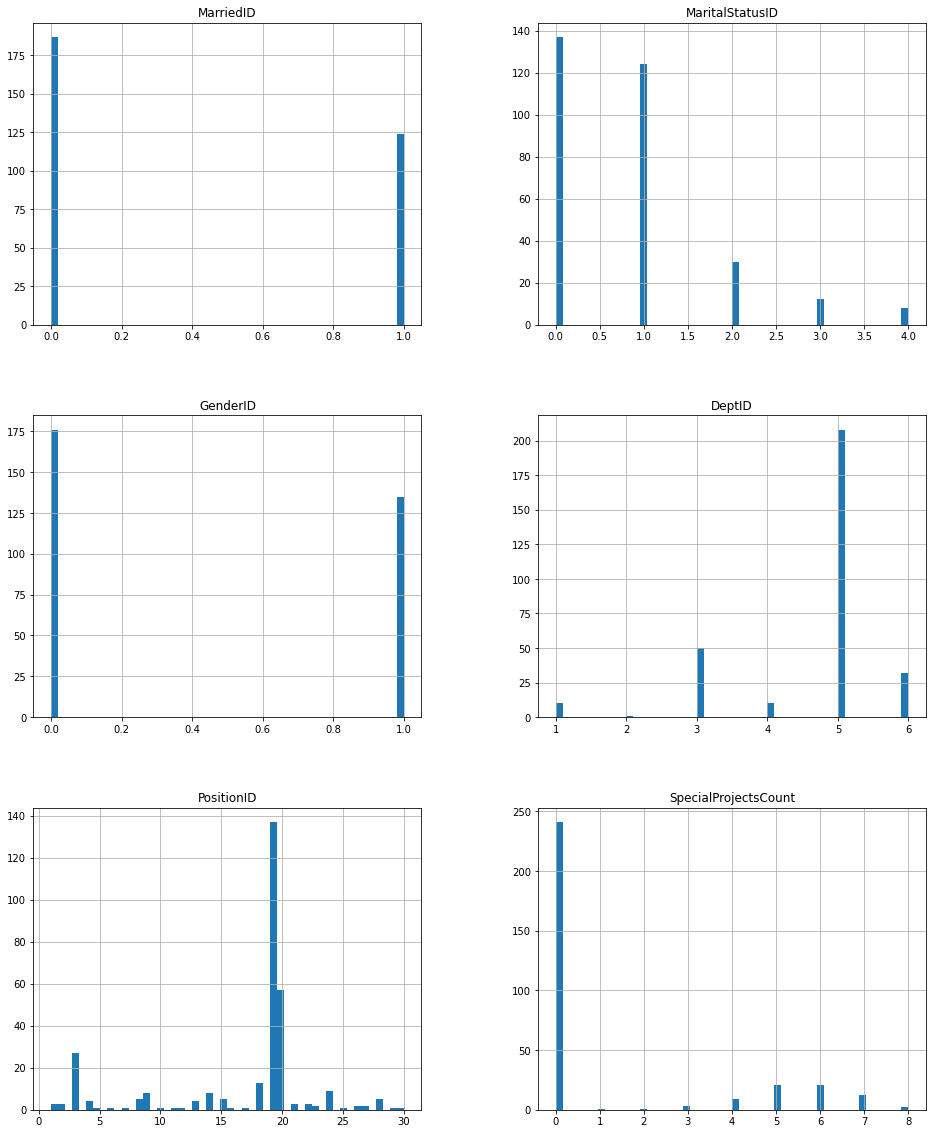

In [29]:
dfcor.hist(figsize=(16, 20), bins=50, xlabelsize=10, ylabelsize=10);

#### A very detailed correlation matrix with seaborns pairplot.

https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

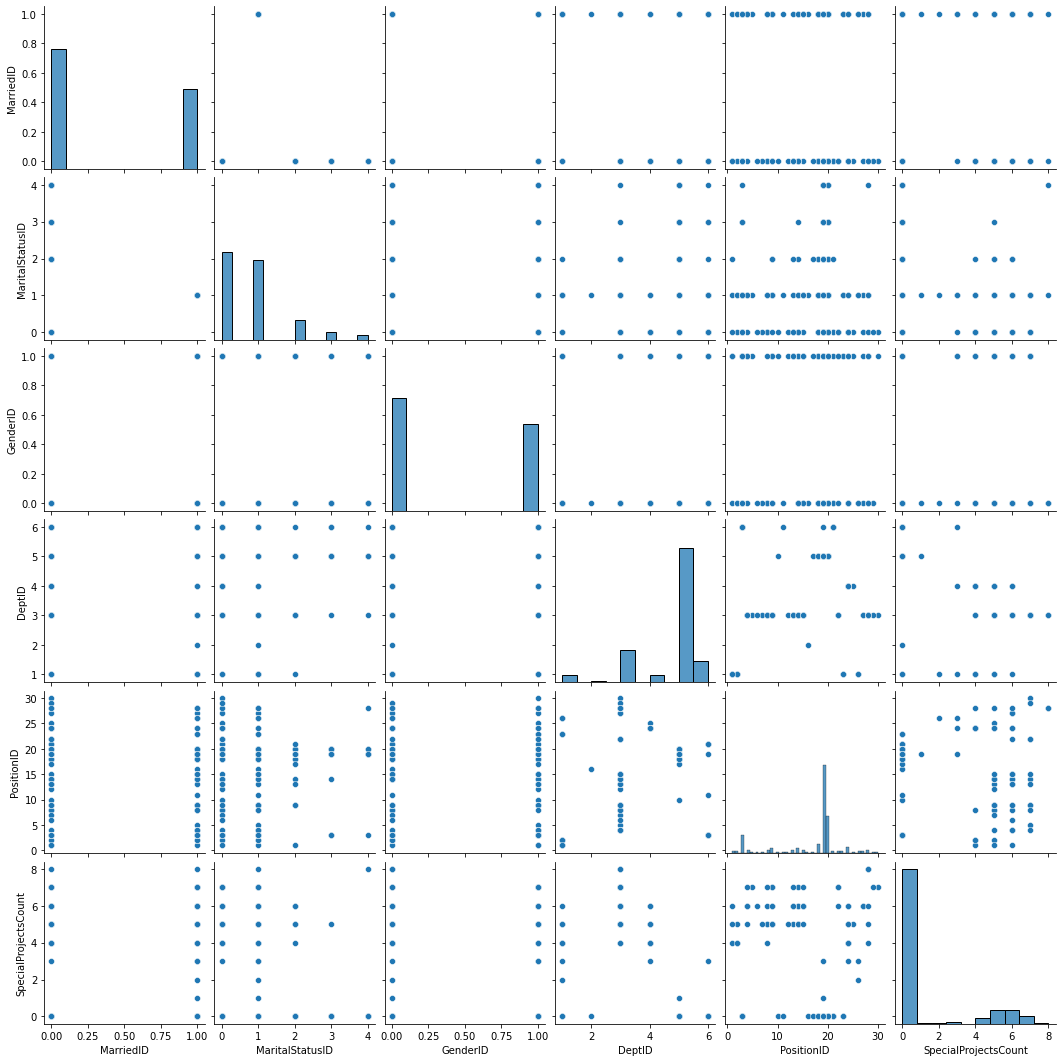

In [30]:
sns.pairplot(dfcor)

#### The Seaborn Relational Plot (relplot) allows us to visualise how variables within a dataset relate to each other. Below you can find a very good explanation: 

https://towardsdatascience.com/seaborn-relplot-in-python-visualising-relationships-in-data-ee39138d53aa

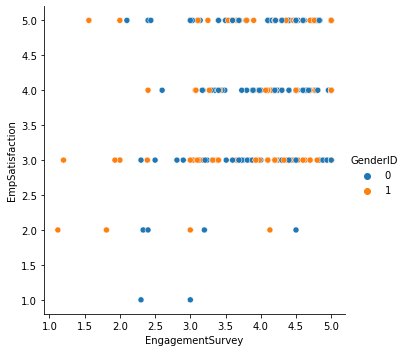

In [31]:
sns.relplot(x='EngagementSurvey', y='EmpSatisfaction', hue='GenderID', data=df)

#### Scatterplot can be used with several semantic groupings which can help to understand well in a graph. They can plot two-dimensional graphics that can be enhanced by mapping up to three additional variables while using the semantics of hue, size, and style parameters.

https://www.geeksforgeeks.org/scatterplot-using-seaborn-in-python/

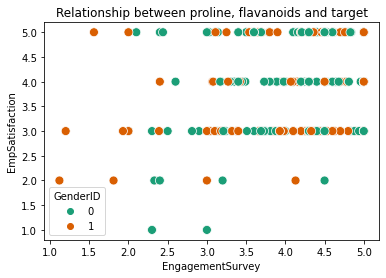

In [32]:
sns.scatterplot(x="EngagementSurvey", y="EmpSatisfaction", hue="GenderID", data=df, palette="Dark2", s=80)
plt.title("Relationship between proline, flavanoids and target")
plt.show()

#### Here is an example of a bar graphic that we grouped Engagement Survey and EmpSatisfaction results that are grouped by GenderID 

<AxesSubplot:>

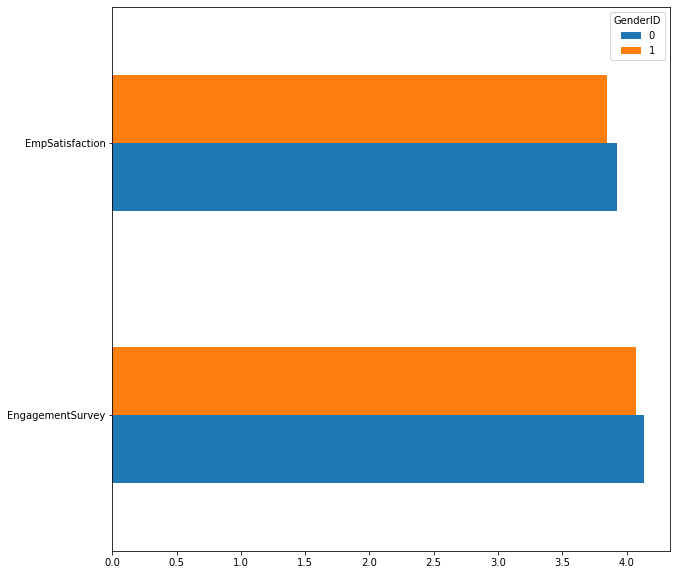

In [33]:
df.groupby('GenderID')[['EngagementSurvey', 'EmpSatisfaction']].mean().T.plot(kind='barh', figsize=(10,10))

#### Seaborns regplot the relationship between two variables in a DataFrame.

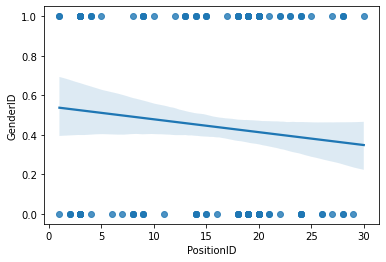

In [34]:
features_to_analyse = ['MarriedID','MaritalStatusID','GenderID','DeptID','PositionID','SpecialProjectsCount']
ax = sns.regplot(x="PositionID", y="GenderID", data=df[features_to_analyse])

#### You create more many subplots at once.

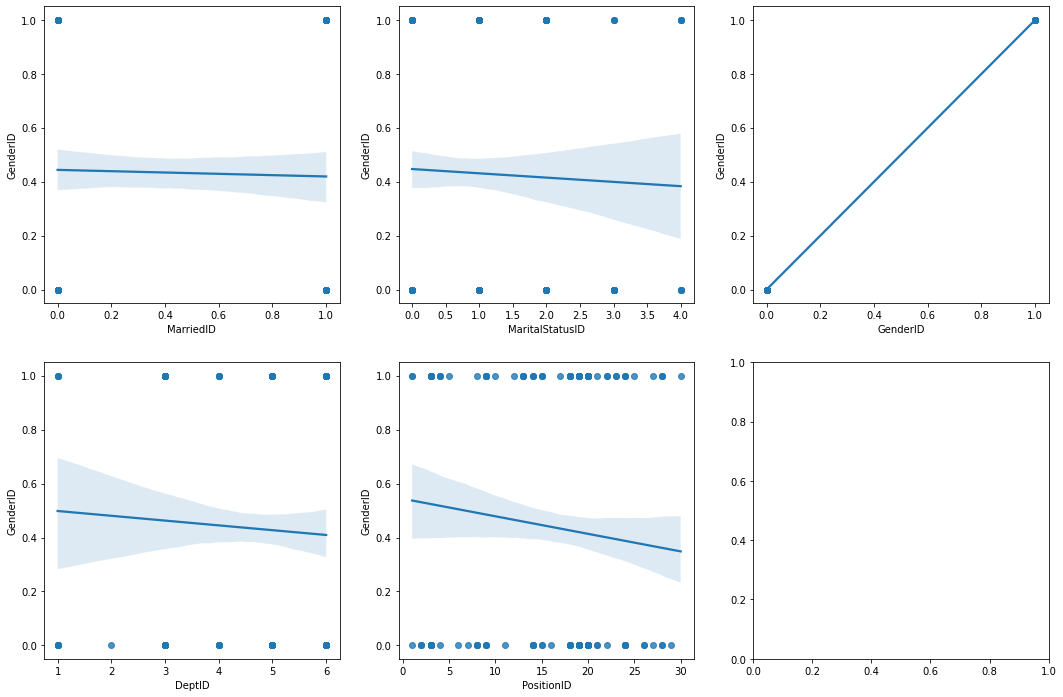

In [35]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='GenderID', data=df[features_to_analyse], ax=ax)

#### You can also do this for standart bar-plots. 

C:\Users\ea58295\AppData\Local\Temp/ipykernel_15868/3077014484.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\ea58295\AppData\Local\Temp/ipykernel_15868/3077014484.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\ea58295\AppData\Local\Temp/ipykernel_15868/3077014484.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\ea58295\AppData\Local\Temp/ipykernel_15868/3077014484.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\ea58295\AppData\Local\Temp/ipykernel_15868/3077014484.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xtickla

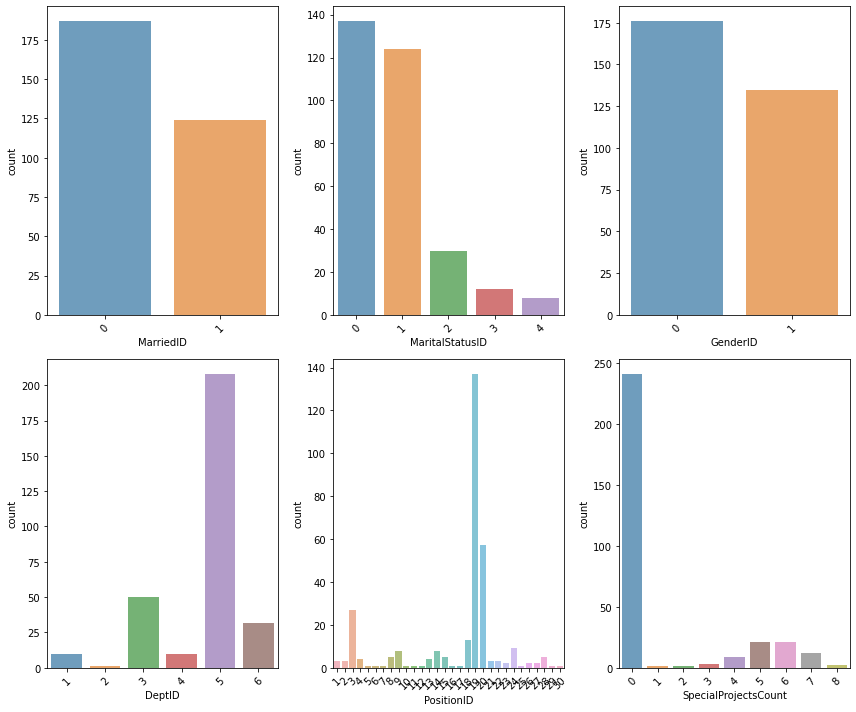

In [36]:
fig, axes = plt.subplots(round(len(dfcor.columns) / 3), 3, figsize=(12, 10))

for i, ax in enumerate(fig.axes):
    if i < len(dfcor.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=dfcor.columns[i], alpha=0.7, data=dfcor, ax=ax)

fig.tight_layout()